In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score 

In [2]:
# Day 07
#k=number of neighbors
# Load the iris dataset
df=sns.load_dataset("iris")
# here setosa is the target

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape # rows and columns

(150, 5)

In [6]:
# Basic Data Exploration
print("\nBasics Information about Dataset:")
print(df.info()) # over veiw of dataset


Basics Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop_duplicates(inplace=True)

<Figure size 1200x800 with 0 Axes>

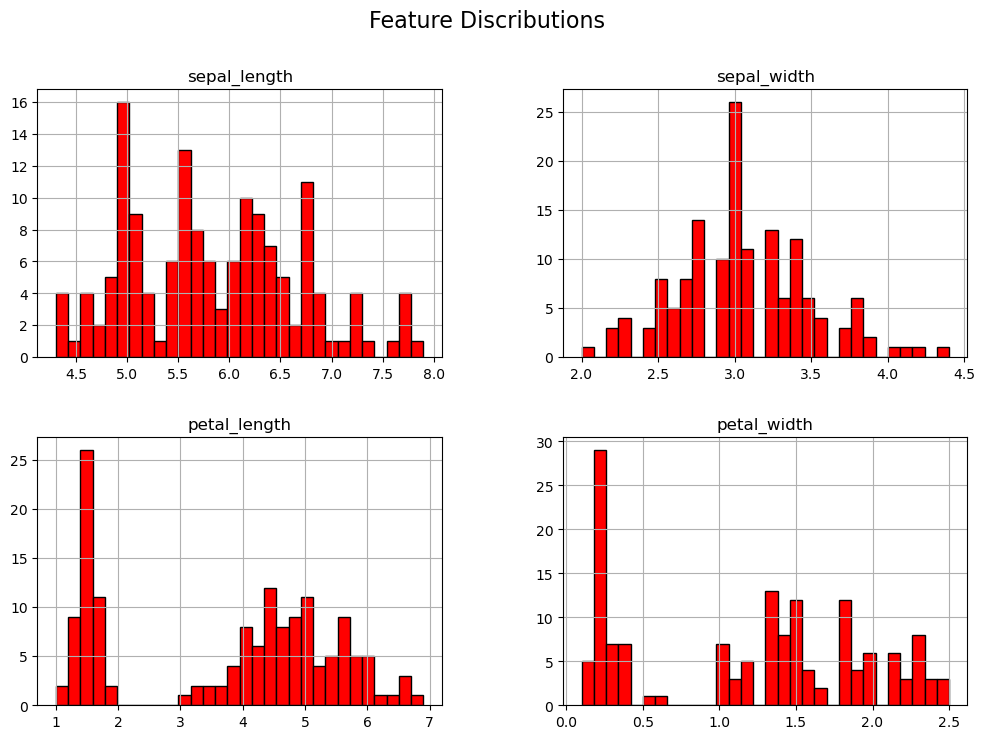

In [12]:
# univeriante analysis
# Histograms for distribution of features
plt.figure(figsize=(12,8)) # this size for the bigger box
df.hist(figsize=(12,8),bins=30,color='r',edgecolor='black') # this figsize for smaller boxes
plt.suptitle("Feature Discributions",fontsize=16)
plt.show()

#### <b><u> Inference from Histograms: </b></u>

1.**Sepal Length**:

 - The distribution of sepal length appears to be roughly normal with a sligth skew towards the right.
 - Most of the sepal length fall between 4.5 and 7.5cm.

2.**Sepal Width**:

- The distribution of sepal width is also roughly normal but with a sligth skew towards the left.
- Most of the sepal widths fall between 2.5 and 3.5cm.

3.**Petal Length**:

- The distribution of petal length is more spread out and shows a clear separation between different species.
- There are distict peaks indicating the presence of different species with varying petal lengths.

4.**Petal Width**:

- Similar to petal length,the distribution of petal width shows  clear separation between species.
- There are distict peaks indicating the presence of different species with varying petal widths.

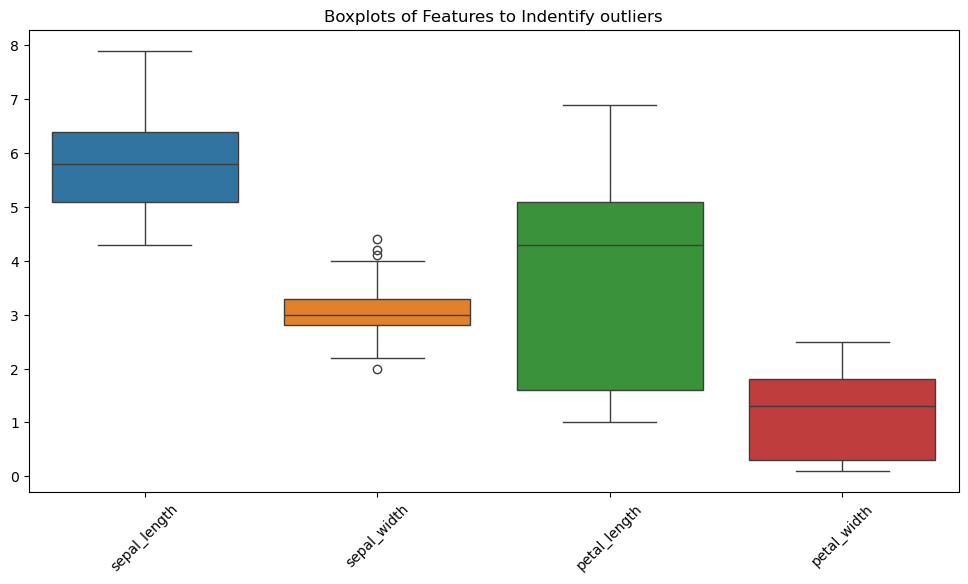

In [13]:
# Boxplots for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots of Features to Indentify outliers")
plt.show()

#### <b><u> Inference from Boxplots: </b></u>

1.**Sepal Length**:
- There are a few outlier in the sepal length distribution.
- The median sepal length is arround 5.8cm,with the inter quartile range(IQR) between 5.1 and 6.4cm.

2.**sepal width**:
- There are several outliers in the sepal width distribution.
- The median sepal width is arround 3.0cm,with the IQR(Inter quartile range)

3.**Petal Length**:
- The petal length distribution shows clear separation between species,with minimal overlap.
- The median petal length varies significantly between species,indicating it is a good feature for classification.

4.**Petal Width**:
- Similar to petal length,the petal width distribution shows clear separation between species.
- The median petal width varies significantly between species,indicating it is also a good feature for classification.                                                                                            

In [15]:
# deviding into numerical and categorical columns
num_col=df.select_dtypes(include=[np.number]).columns
cat_col=df.select_dtypes(include=['object']).columns
print(f"numerical_data{num_col}")
print(f"categorical_data{cat_col}")

numerical_dataIndex(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
categorical_dataIndex(['species'], dtype='object')


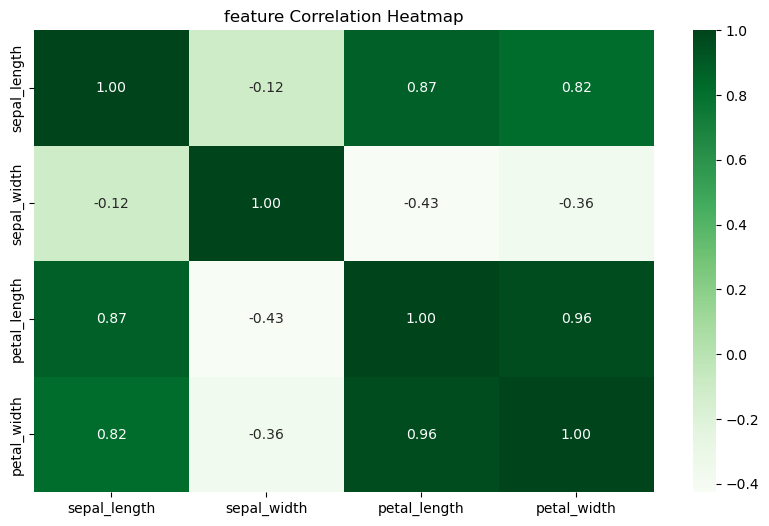

In [16]:
# correlation Matrix
num=df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,6))
corr_matrix=df[num].corr('pearson')
sns.heatmap(corr_matrix,annot=True,cmap='Greens',fmt='.2f')
plt.title("feature Correlation Heatmap")
plt.show()

#### <b><u>:Based on the correlation matrix,we can infer the following</b></u>
1. **Sepal Length**:
- positively correlated with petal length(0.87) and petal width(0.82).
- Weak negative correlation with sepal width (-0.12).

2.**Sepal Width**:
- Weak negative correlation with sepal length(-0.12),petal length(-0.43) and petal width (-0.37).

3.**Petal Length**:
- Strong positive correlation with sepal length (0.87) and petal width (0.96).
- Weak negative correlation with sepal width (-0.43).

4.**Petal Width**:
- Strong positive correlation with petal length (0.95) and petal width (0.96).
- Weak negative correlation with sepal width (-0.37)
5.**Species**:
-  Strong positive correlation with petal length (0.95) and petal width (0.96).
- Moderate posive correlation with sepal length (0.78).
- Moderate negative correlation sepal width (-0.43).


In [17]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [18]:
#  Encode is associating a word into num(bcz mechine understood the num)
label_encoder=LabelEncoder()
df["species"]=label_encoder.fit_transform(df["species"])

In [19]:
df.species.value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

In [20]:
# Define features and target
x=df.drop(columns=["species"]) #all features except species
y=df["species"] #Target feature

In [21]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 149, dtype: int64

In [30]:
# split into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
# here .20 is 20% for testing and 80% for training and 42 (also 0 and 123)is the standard code to selecting the random value

In [25]:
x_train.shape

(119, 4)

In [26]:
x_test.shape

(30, 4)

In [27]:
y_train.shape

(119,)

In [28]:
y_test.shape

(30,)

In [35]:
# Function to evaluate k-nn for different values of k
def evaluate_knn(k_values,weights='uniform'):
    results={}
    for k in k_values:
        knn=KNeighborsClassifier(n_neighbors=k,weights=weights)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        f1=f1_score(y_test,y_pred,average='weighted')
        results[k]={'accuracy':accuracy,'f1_score':f1}
    return results

In [38]:
# Test for 3,5,7
k_values=[3,5,7]
regular_knn_results=evaluate_knn(k_values,weights='uniform')
weighted_knn_results=evaluate_knn(k_values,weights='distance')

In [42]:
regular_knn_results

{3: {'accuracy': 1.0, 'f1_score': 1.0},
 5: {'accuracy': 1.0, 'f1_score': 1.0},
 7: {'accuracy': 1.0, 'f1_score': 1.0}}

In [40]:
weighted_knn_results

{3: {'accuracy': 1.0, 'f1_score': 1.0},
 5: {'accuracy': 1.0, 'f1_score': 1.0},
 7: {'accuracy': 1.0, 'f1_score': 1.0}}

In [43]:
# convert results to dataFrame for comparison
results_df=pd.DataFrame.from_dict({
    'Regular k-NN':regular_knn_results,
    'Weighted k-NN':weighted_knn_results
},orient='index').T
results_df # 1.0 means 100% accuracy.

,Regular k-NN,Weighted k-NN
3,"{'accuracy': 1.0, 'f1_score': 1.0}","{'accuracy': 1.0, 'f1_score': 1.0}"
5,"{'accuracy': 1.0, 'f1_score': 1.0}","{'accuracy': 1.0, 'f1_score': 1.0}"
7,"{'accuracy': 1.0, 'f1_score': 1.0}","{'accuracy': 1.0, 'f1_score': 1.0}"
